<a href="https://colab.research.google.com/github/woodRock/deep-learning-goodfellow/blob/main/chapter_5_machine_learning_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 5 | Machine Learning Basics

# Learning Algorithms

- Classification
- Classification with missing inputs
- Regression
- Transcription
- Machine translation
- Structured output
- Anomaly detection
- Synthesis and sampling
- Imputation of missing values
- Denoising
- Density estimation or probability mass function estimation

# Supervised and Unsupervised Learning

**Unsupervised learning algorithms** experience a dataset containing many features, then learn useful properties of the structure of this dataset. In the context of deep learning, we usually want to learn the entire probability distribution that generated a dataset, whether explicitly, as in density estimation, or implicitly for tasks such as synthesis or denosing.

**Supervised learning algorithms** experience a dataset containing features, but each example is also associated with a label or target. For example, the Iris dataset is annotated with species of each iris plant.

# Linear Regression

Linear regression solves the regression problem. In other words, the goal is to build a system that can take a vector $x \in \mathbb{R}^n$ as input and predict the value of a scalar $y \in \mathbb{R}$ The output of linear regression is a linear function of the input. Let $\hat{y}$ be the value that our model predicts y should take on. We define the output to be

$$
  \hat{y} = w^Tx
$$

where $w \in \mathbb{R}$ is a vector of parameters

## Mean Squared Error

We need a performance measure to evaluate the model.

$$
  MSE_{test} = \frac{1}{m} \sum_i (\hat{y}^{(test)} - y^{(test)})^2_i \\
$$

Intiutively, one can see the error measure decreases to $0$ when $\hat{y}^{(test)} = y^{(test)}$

We can also see that:

$$
  MSE_{test} = \frac{1}{m} || \hat{y}^{(test)} - y^{(test)} ||^2_2
$$

so the error increases whenevery the Euclidean distance between the predictions and the targets increase.

To minimize $MSE_{train}$ we can simply solve for where its gradient is 0:

$$
  \nabla_w MSE_{train} = 0 \\
  \nabla_w \frac{1}{m} || \hat{y}^{(train)} - y^{(train)} ||^2_2 = 0 \\
  \frac{1}{m} \nabla_w || X^{(train)}w - y^{(train)}||^2_2 = 0  \\
  \nabla_w (X^{(train)}w - y^{(train)})^T(X^{(train)}w - y^{(train)}) = 0 \\
  \nabla_w (w^T X^{(train)T} X^{(train)}w - 2w^TX^{(train)T}y^{(train)} + y^{(train)T}y^{(train)}) = 0  \\
  2 X^{(train)T}X^{(train)}w - 2X^{(train)T}y^{(train)} = 0 \\
  w = (X^{(train)T}X^{(train)})^{-1} X^{(train)T}y^{(train)}
$$

The system of equations whose solutions are given on the final line are known as the **normal equations**.

It is worth noting that the term **linear regression** is often used to refer to a slightly more sophisticated model with one additional parameter - an intercept term b

$$
  \hat{y} = w^Tx + b
$$

So mapping from parameters to predictions is still a linear function but the mapping from features to predictions is now an affine function. This extension to affine functions means the plot of the model's predictions still looks like a line, but it need not pass through the origin.

The intercept term $b$ is often called the bias parameter of the affine transformation. The terminology derives from the point of view that the output of the transformation is biased towards being $b$ in the absence of any input.


Final parameters: w = 1.9540, b = 1.0215


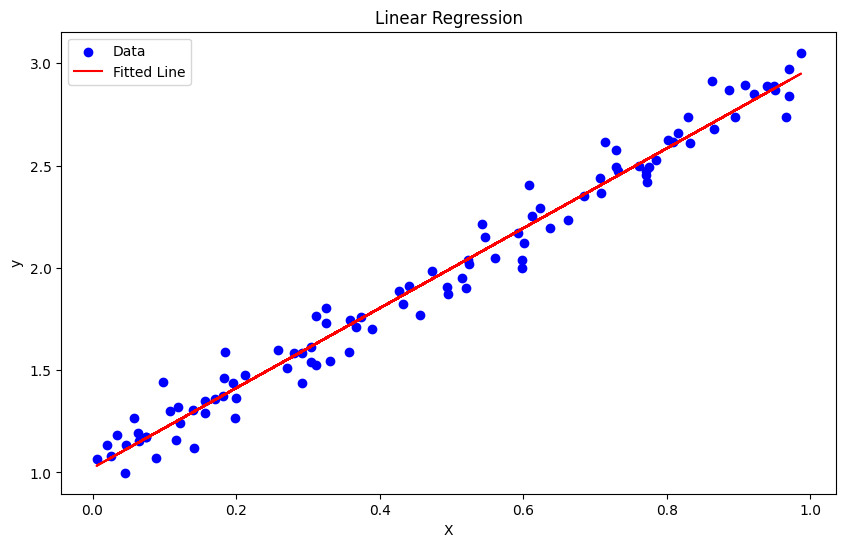

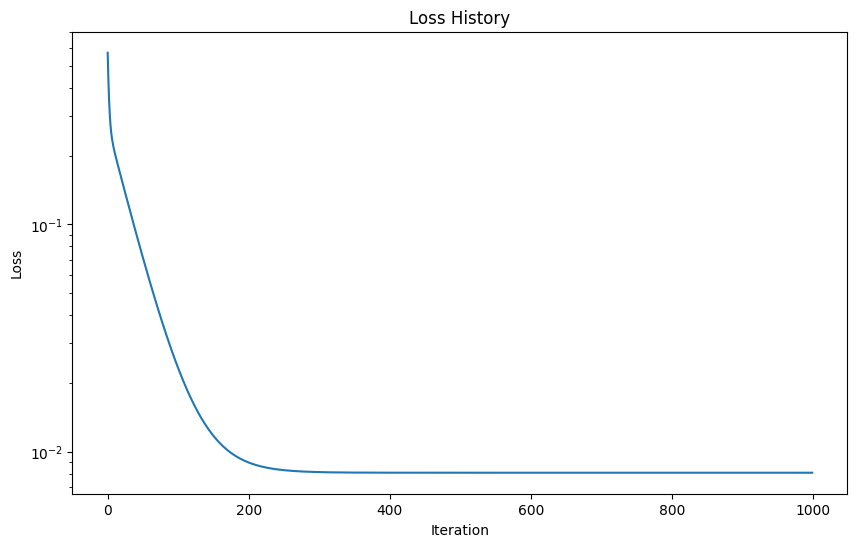

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 * X + 1 + np.random.randn(100, 1) * 0.1

# Initialize parameters
w = np.random.randn(1, 1)
b = np.random.randn(1)

# Hyperparameters
learning_rate = 0.1
num_iterations = 1000

# Lists to store the loss history
loss_history = []

# Gradient descent
for i in range(num_iterations):
    # Forward pass
    y_pred = np.dot(X, w) + b

    # Compute loss
    loss = np.mean((y_pred - y) ** 2)
    loss_history.append(loss)

    # Compute gradients
    dw = (2/len(y)) * np.dot(X.T, (y - y_pred))
    db = (2/len(y)) * np.sum(y - y_pred)

    # Update parameters
    w += learning_rate * dw
    b += learning_rate * db

# Print final parameters
print(f"Final parameters: w = {w[0][0]:.4f}, b = {b[0]:.4f}")

# Plot the data and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, np.dot(X, w) + b, color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Plot the loss history
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss History')
plt.yscale('log')
plt.show()

# Capacity, Overfitting and Underfitting

The central challenge in machine learning is that our algorithm must perform well on new, previously unseen inputs - not just those on which our model was trained. The ability to perform well on previously unobserved inputs is called generalization.

What seperates machine learning from optomization is that we want the **generalization error** also called the **test error**, to be low was well. The generalization error is defined as the expected value of the error on a new input.

In our linear regression example, we trained the model

$$
\frac{1}{m^{(train)}} || X ^{(train)}w - y^{(train)} ||^2_2
$$

But we actually care about the test error

$$
  \frac{1}{m^{(test)}} || X^{(test)}w - y^{(test)} ||^2_2
$$

**Underfitting** occurs when the model is not able to obtain a sufficiently low error value on the training set.

**Overfitting** occurs when the gap between training error and test error is too large.

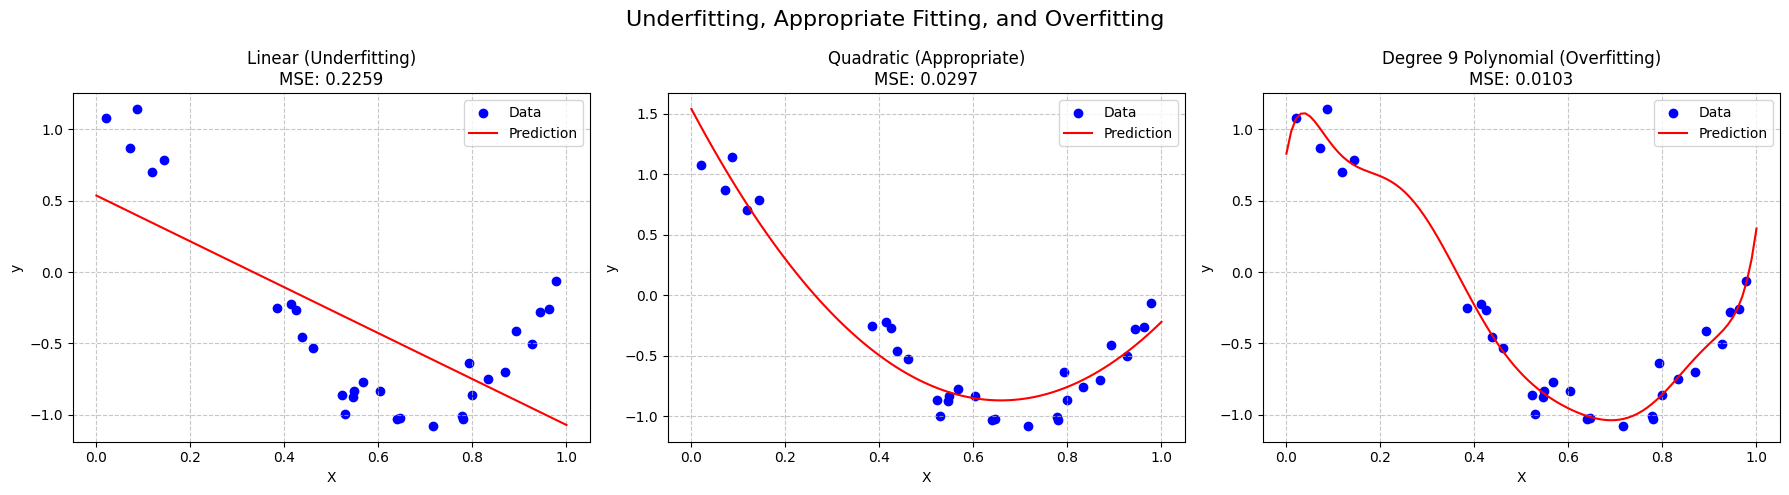

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = np.sort(np.random.uniform(0, 1, 30))
y = np.cos(1.5 * np.pi * X) + np.random.normal(0, 0.1, 30)

# Reshape X for sklearn
X = X.reshape(-1, 1)

# Create models
models = [
    ("Linear (Underfitting)", LinearRegression()),
    ("Quadratic (Appropriate)", LinearRegression()),
    ("Degree 9 Polynomial (Overfitting)", LinearRegression())
]

# Prepare the plot
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Underfitting, Appropriate Fitting, and Overfitting", fontsize=16)

# Colors for actual data and predictions
data_color = 'blue'
pred_color = 'red'

for i, (title, model) in enumerate(models):
    ax = axs[i]

    # Prepare features
    if i == 0:  # Linear
        X_poly = X
    elif i == 1:  # Quadratic
        X_poly = PolynomialFeatures(degree=2).fit_transform(X)
    else:  # Degree 9 Polynomial
        X_poly = PolynomialFeatures(degree=9).fit_transform(X)

    # Fit the model
    model.fit(X_poly, y)

    # Make predictions
    X_test = np.linspace(0, 1, 100).reshape(-1, 1)
    if i == 0:
        X_test_poly = X_test
    elif i == 1:
        X_test_poly = PolynomialFeatures(degree=2).fit_transform(X_test)
    else:
        X_test_poly = PolynomialFeatures(degree=9).fit_transform(X_test)

    y_pred = model.predict(X_test_poly)

    # Calculate MSE
    mse = mean_squared_error(y, model.predict(X_poly))

    # Plot
    ax.scatter(X, y, color=data_color, label='Data')
    ax.plot(X_test, y_pred, color=pred_color, label='Prediction')
    ax.set_title(f"{title}\nMSE: {mse:.4f}")
    ax.set_xlabel("X")
    ax.set_ylabel("y")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()